# Introduction

In this coursework project, I will be exploring the application of Convolutional Neural Networks (CNN) for Image Classification. 
Image Classification is defined as the task of classifying an image from a set of categories. Throughout this project, I will be exploring the Cifar-10 dataset, doing tasks such as preprocessing and preparing the images to be a valid input for my chosen learning algorithms. I will be comparing my findings from each algorithm with each other using three different sets of testing parameters to test their  performance with each of the given parameters. 


# The selected dataset for the algorithm comparison

# CIFAR-10

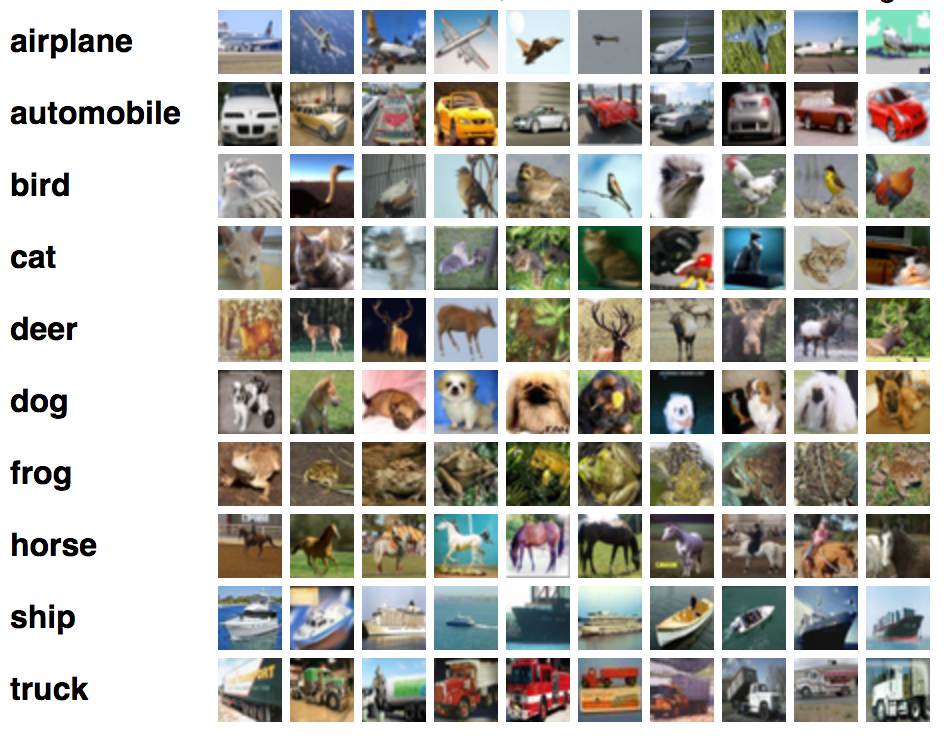

CIFAR-10 (Canadian Institute For Advanced Research) is a collection of images used to train machine. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes (Alex Krizhevsky, 2009). The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. 
Since the images in CIFAR-10 are low-resolution (32x32), this dataset can allow quick training of algorithms to see what works..  
The classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. 


# The algorithms to compare with appropriate reasoning why they were chosen


# LeNet

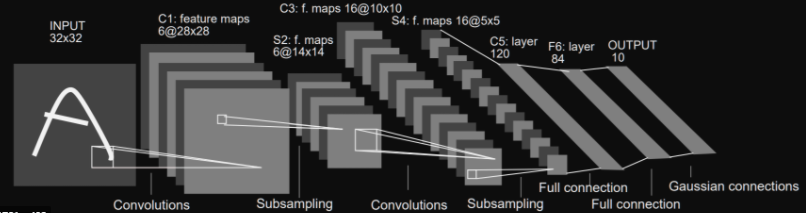

LeNet5 was one of the earliest convolutional neural networks and promoted the development of deep learning. Since 1988, after years of research and many successful iterations, the pioneering work has been named LeNet5 LeCun, Y. (2015). For this coursework I decided to pick LeNet to explore the work that has been done, and to show just how far the technology has advanced form when LeCun created LeNet to scan bank cheques. 



# AlexNet

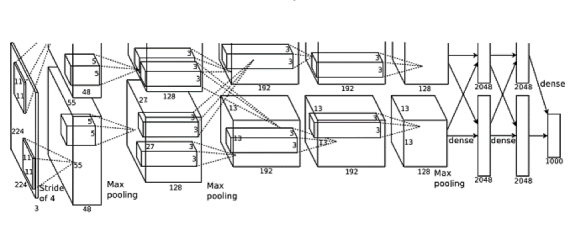

AlexNet, which employed an 8-layer CNN, won the ImageNet Large Scale Visual Recognition Challenge 2012 by a phenomenally large margin. This network showed, for the first time, that the features obtained by learning can transcend manually-designed features, breaking the previous paradigm in computer vision (Mu Li, 2020) 
The architectures of AlexNet and LeNet are very similar, as seen below. Note that we provide a slightly streamlined version of AlexNet removing some of the design quirks that were needed in 2012 to make the model t on two small GPUs (Khan et al, 2020). 
Confusingly, there are two "paths" of processing through the network (as seen above). This is due to the original AlexNet model being implemented on two GPUs in parallel. Almost all implementations of AlexNet are now on a single GPU and our implementation is too. As it name sake comes from LeNet I wanted to compare the two and nd out which would work better, since AlexNet is better suited to larger 225(77) * 224(7) I wanted to see how it fared against LeNet making use of advancements in technology in the way of using the GPU for processing and power. 


# LeNet & AlexNet

It is interesting to not the similarities to the two algorithms, with the main difference begin in the parameters, with the addition of the 3 extra convolutional layers and use of max pooling and how it took so long for the advancement in the eld to happen is a testament to how both complex and simple CNN's can be at the same time.  

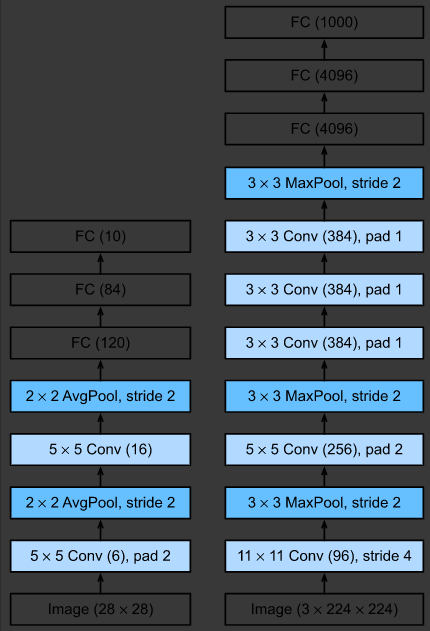

# The training and testing of the algorithms

# Run

In [11]:
import os
# Use GPU if available
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32" 
import numpy as np
# Import everything we need from keras
import keras
from keras.layers import Input, Conv2D, Dense, Activation, MaxPooling2D,AveragePooling2D
from keras.models import Model, load_model
from keras.layers import Dropout,Flatten
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import he_normal
from keras.callbacks import LearningRateScheduler, TensorBoard
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pandas as pd
from termcolor import colored
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.style.use('seaborn-dark-palette')
# Set testing params
batch_size         = 32          # Number of training examples (Usually 32 or 64)
epochs             = 10          # Full forward and backward pass'
iterations         = 128         # Number of passes, using batch size (Leave blank for all)
DATA_FORMAT='channels_last'      # Tensorflow:'channels_last'
log_filepath  = './cnn'

In [12]:
# Hardcode in the labels and count
class_names = ['airplane', 'automobile', 'bird', 'cat','deer','dog', 'frog', 'horse', 'ship', 'truck']
class_count = 10
# Used to perform reproducible test 
np.random.seed(0)

In [13]:
# Load data using keras, imports from toronto.edu, the home of the cifar dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

In [14]:
# Shape of the input sets
x_train_shape = x_train.shape
x_test_shape = x_test.shape 
print(x_train_shape)
print(x_test_shape)
# Print out the number of examples in each set of data
print(f'Number of training examples: {len(x_train)}')
print(f'Number of testing examples: {len(x_test)}')

(50000, 32, 32, 3)
(10000, 32, 32, 3)
Number of training examples: 50000
Number of testing examples: 10000


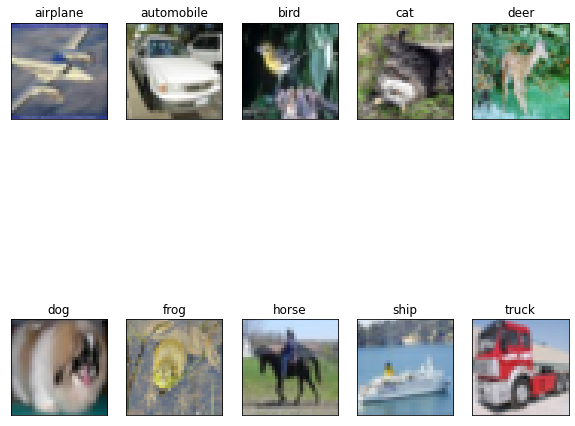

In [15]:
# Print all unique labels in the dataset
fig = plt.figure(figsize=(10,10))
for i in range(class_count):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    xid = np.where(y_train[:]==i)[0]
    xid_features = x_train[xid,::]
    imgnum = np.random.randint(xid_features.shape[0])
    out = np.transpose(xid_features[imgnum,::], (0,1,2))
    ax.set_title(class_names[i])
    plt.imshow(out)
plt.show()

In [16]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, class_count)
y_test  = keras.utils.to_categorical(y_test, class_count)

# Lenet

First Layer: convolution layer using six kernels of 5x5, the size of feature mapping is 28x28

Second Layer: pooling layer that outputs 6 feature graphs of size 14x14

Third Layer: convolution layer with 16 5-5 kernels

Fouth Layer: pooling layer with a size of 2x2 and output of 16 5x5

Five Layer: convolution layer with 120 convolution kernels of size 5x5

Sixth Layer: fully connected  layer with 84 feature graphs

In [17]:
def lenett(img_input): #Lenet algorithm
  # 1st Conv Layer
  x = Conv2D(6,(5, 5),padding='same', activation='relu')(img_input)
  # Max Pool Layer
  x = AveragePooling2D(pool_size=(2, 2), strides=(2,2))(x)
  # 2nd Conv Layer
  x = Conv2D(16,(5,5),padding='same', activation='relu')(x)
  # Max Pool Layer
  x = AveragePooling2D(pool_size=(2, 2), strides=(2,2))(x)
  # Flatten the Layer for transitioning to the Fully Connected Layers
  x = Flatten()(x)
  # Fully Connected Layers
  x = Dense(120, activation='relu')(x)
  x = Dense(84, activation='relu')(x)
  x = Dense(10, activation='relu')(x)
  # Output Layer
  out = Dense(class_count, activation='softmax')(x)
  return out

In [18]:
img_input=Input(shape=(32,32,3)) #Declare image size
model = keras.Sequential()
output = lenett(img_input)
model=Model(img_input,output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d_2 (Average (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               1230

# Alexnet

First Layer:

convolutional layer with 96 feature maps or filters having size 11×11 and a stride of 4. 

maximum pooling layer with a filter size 3×3 and a stride of two.

Second Layer:

256 feature maps having size 5×5 and a stride of 1.

maximum pooling layer with filter size 3×3 and a stride of 2. This layer is same as the second layer except it has 256 feature maps

Third, Fourth and Fifth Layers:

convolutional layers with filter size 3×3 and a stride of one. The first two used 384 feature maps where the third uses 256 filters.

followed by a maximum pooling layer with filter size 3×3, a stride of 2 and have 256 feature maps.

Sixth Layer:
convolutional layer output is flattened through a fully connected layer with 9216 feature maps each of size 1×1.

Seventh and Eighth Layers:
Two fully connected layers with 4096 units.

Output Layer:
Finally, there is a softmax output layer y with 1000 possible values.

Summary of AlexNet Architecture:

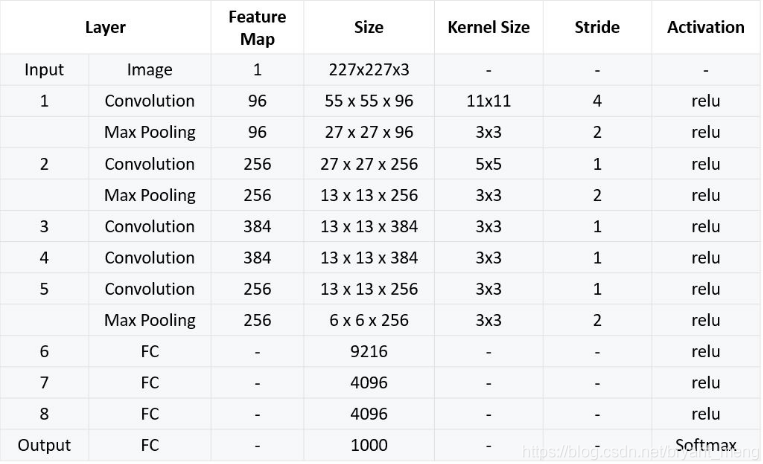

In [ ]:
def alexnet(img_input): #Alexnet algorithm

    # 1st Convolutional Layer
    x = Conv2D(96,(11,11),strides=(4,4),padding='same', activation='relu',kernel_initializer='uniform')(img_input)# valid
    # Pooling Layer
    x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same',data_format=DATA_FORMAT)(x)
    # 2nd Convolutional Layer
    x = Conv2D(256,(5,5),strides=(1,1),padding='same', activation='relu',kernel_initializer='uniform')(x)
    # Pooling Layer           
    x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same',data_format=DATA_FORMAT)(x)
    # 3rd Convolutional Layer
    x = Conv2D(384,(3,3),strides=(1,1),padding='same', activation='relu',kernel_initializer='uniform')(x) 
    # 4th Convolutional Layer
    x = Conv2D(384,(3,3),strides=(1,1),padding='same', activation='relu',kernel_initializer='uniform')(x) 
    # 5th Convolutional Layer
    x = Conv2D(256,(3,3),strides=(1,1),padding='same', activation='relu',kernel_initializer='uniform')(x)
    # Pooling Layer
    x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same',data_format=DATA_FORMAT)(x)
    # Passing it to a dense layer
    x = Flatten()(x)
    # 1st Dense Layer
    x = Dense(4096,activation='relu')(x)
    # Add Dropout to prevent overfitting
    x = Dropout(0.5)(x)
    # 2nd Dense Layer
    x = Dense(4096,activation='relu')(x)
    # Add Dropout
    x = Dropout(0.5)(x)
    x = Dense(1000,activation='relu')(x)
    # Output Layer
    out = Dense(class_count, activation='softmax')(x)
    return out

In [ ]:
img_input=Input(shape=(32,32,3)) #Declare image size
model = keras.Sequential()
output = alexnet(img_input)
model=Model(img_input,output)
model.summary()

# Train

In [19]:

# Decrease the learning rate gradually based on the epoch
def scheduler(epoch):
    if epoch < 100:
        return 0.01
    if epoch < 200:
        return 0.001
    return 0.0001

#stochastic gradient descent
sgd = optimizers.SGD(lr= .1, momentum= 0.9, nesterov= True) 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Set callback
tb_cb = TensorBoard(log_dir=log_filepath, histogram_freq=0)
change_lr = LearningRateScheduler(scheduler)
callbacks = [change_lr,tb_cb]

# Set data augmentation
dataaug = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.125, height_shift_range=0.125, fill_mode='constant',cval=0.)
dataaug.fit(x_train)

#Start time to check total time of testing
start_time = time.time()  
modelcall = model.fit(dataaug.flow(x_train, y_train,batch_size=batch_size), steps_per_epoch = iterations, epochs=epochs, callbacks=callbacks, validation_data=(x_test, y_test))

#Evaluate score, then print
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))
elapsed_time = time.time() - start_time
print("Elapsed time: {}" , elapsed_time)

print("Epochs: {}" , epochs)
print("Iterations: {}" , iterations)
print("Batch Size: {}" , batch_size)

Epoch 1/10
128/128 [==============================] - 3s 24ms/step - loss: 2.3020 - accuracy: 0.1084 - val_loss: 2.2753 - val_accuracy: 0.1552
Epoch 2/10
128/128 [==============================] - 3s 22ms/step - loss: 2.2539 - accuracy: 0.1499 - val_loss: 2.1305 - val_accuracy: 0.2280
Epoch 3/10
128/128 [==============================] - 3s 21ms/step - loss: 2.1135 - accuracy: 0.2146 - val_loss: 1.9719 - val_accuracy: 0.2848
Epoch 4/10
128/128 [==============================] - 3s 22ms/step - loss: 1.9950 - accuracy: 0.2680 - val_loss: 1.9112 - val_accuracy: 0.2965
Epoch 5/10
128/128 [==============================] - 3s 22ms/step - loss: 1.9323 - accuracy: 0.2828 - val_loss: 1.8367 - val_accuracy: 0.3328
Epoch 6/10
128/128 [==============================] - 3s 21ms/step - loss: 1.8617 - accuracy: 0.3092 - val_loss: 1.7908 - val_accuracy: 0.3380
Epoch 7/10
128/128 [==============================] - 3s 21ms/step - loss: 1.8142 - accuracy: 0.3160 - val_loss: 1.7472 - val_accuracy: 0.3580

Wrong!


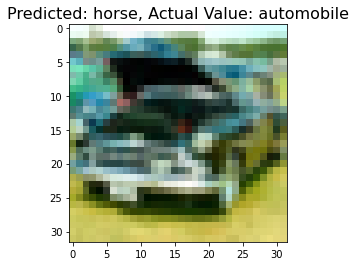

In [20]:
# Grab a single element and compare it 
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

# Displayed the image, and what the models prediction and the actual value are
plt.title("Predicted: {}, Actual Value: {}".format(class_names[y_sample_pred_class], class_names[y_sample_true]), fontsize=16)
plt.imshow(x_sample)

# Visual to show if the model got the prediction right or wrong
if (class_names[y_sample_pred_class] == class_names[y_sample_true]):
    print(colored('Correct!', 'green'))
else:
        print(colored('Wrong!', 'red'))

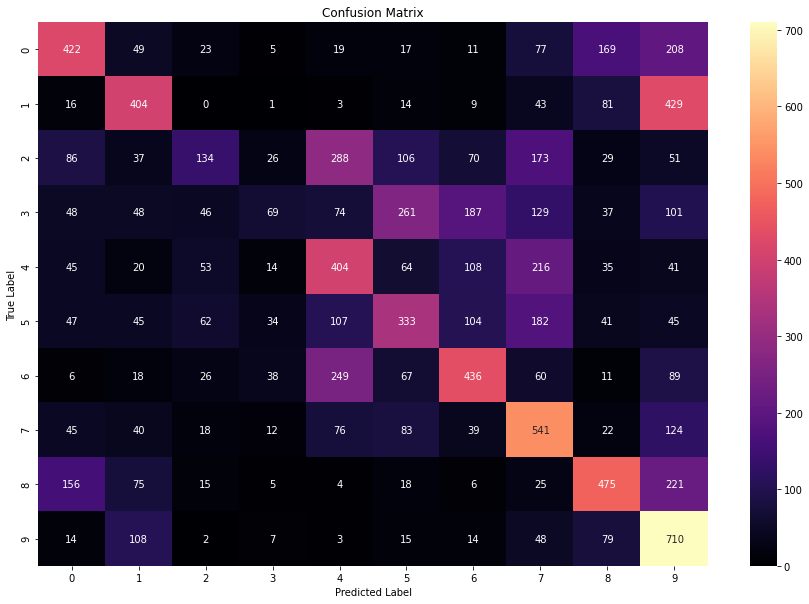

In [21]:
# Plot confusion matrix, to show all predictions
# Can be used to get a visual of correct and incorrect guess'
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap='magma')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# Errors

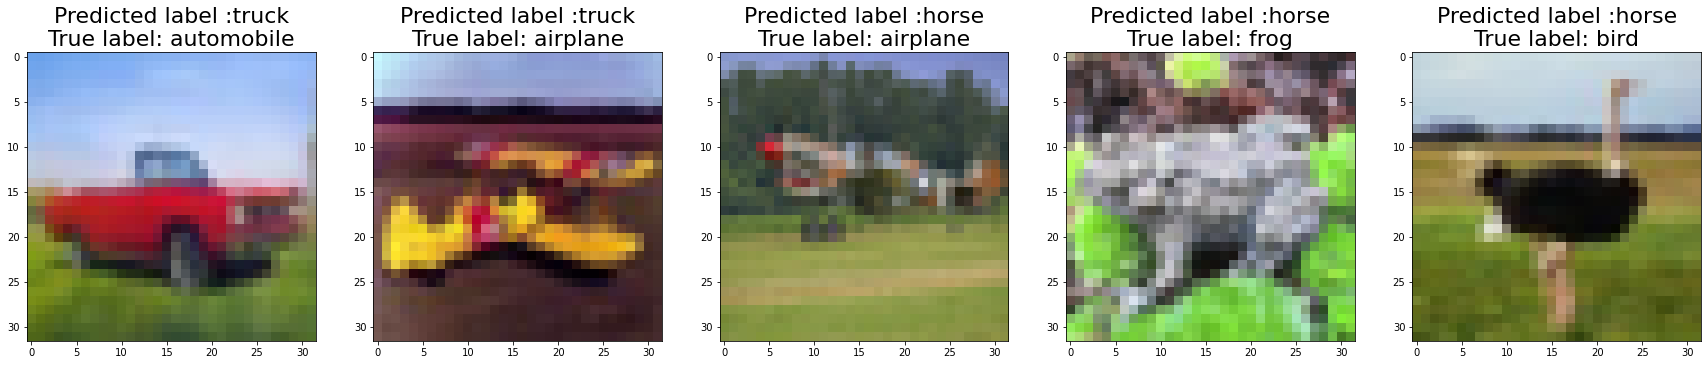

In [22]:
errors = (y_pred_classes - y_true != 0)
y_predicted_classes_errors = y_pred_classes[errors]
y_predicted_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

y_predicted_errors_probability = np.max(y_predicted_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_predicted_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_predicted_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

# Display the 5 images with the highest error in prediction
for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx]
  y_t = y_true_errors[idx]
  y_p = y_predicted_classes_errors[idx]
  ax[i].imshow(sample)
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(class_names[y_p], class_names[y_t]), fontsize=20)

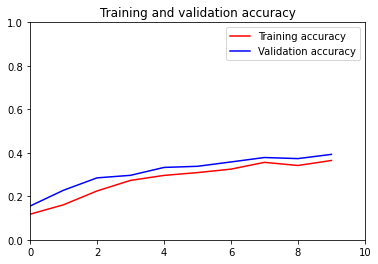

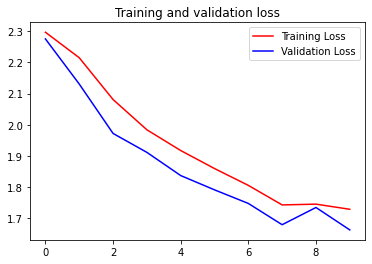

In [23]:
# Plot accuracy  and loss obtained by the compiled model
xmin = 0
xmax = 10 
ymin = 0.0 # 0% 
ymax = 1.0 # 100% 
acc = modelcall.history['accuracy']
val_acc = modelcall.history['val_accuracy']
loss = modelcall.history['loss']
val_loss = modelcall.history['val_loss']

# Grab eppochs for each plot
epochs = range(len(acc)) 

#Set plot axes
axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])

# Plot the accuracy
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Plot the loss 
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

# Print
plt.show()

#	Algorithmic performance evaluation and comparison

# LeNet long test

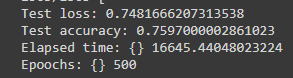

The first test that ran, took longer than 4 hours to complete, this was due to the testing parameters running 500 epochs iterating through all batches in the data. LeNet seemed to perform better than AlexNet, to my surprise, taking 16 minutes longer to outperform the other algorithm, as evident from the confusion matrix we can see that the algorithm for the most part got the images classied just ne except for in the case of comparing cats & dogs, which to humans is an understandable mistake. 

# *Confusion Matrix Legend*



 * airplane     0
 * automobile   1
 * bird         2
 * cat          3
 * deer 4
 * dog 5 
 * frog 6 
 * horse 7 
 * ship 8 
 * truck 9




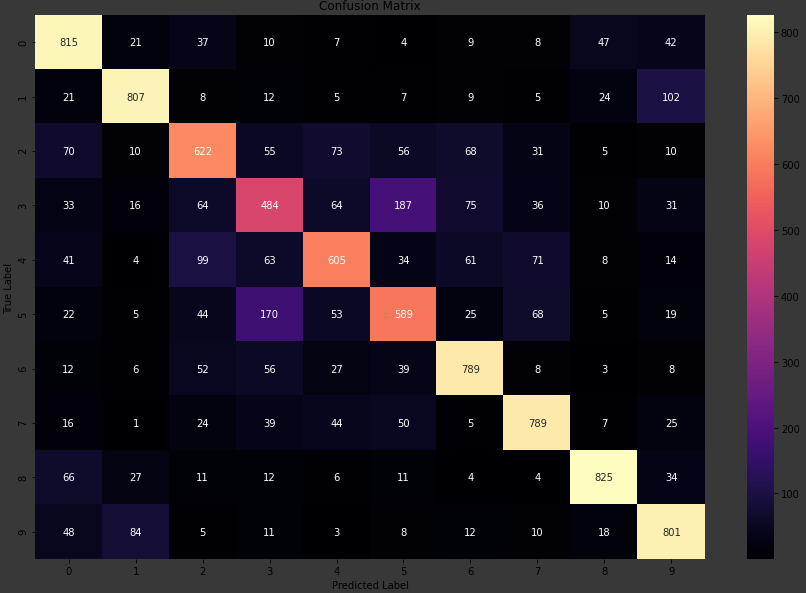

From looking at the accuracy and loss graphs we get an idea that accuray steadily increases, it is worth noting that loss takes a major drop after the 100th epoch mark, the validation loss grows larger than the training loss indicating that overtting is happening onwards

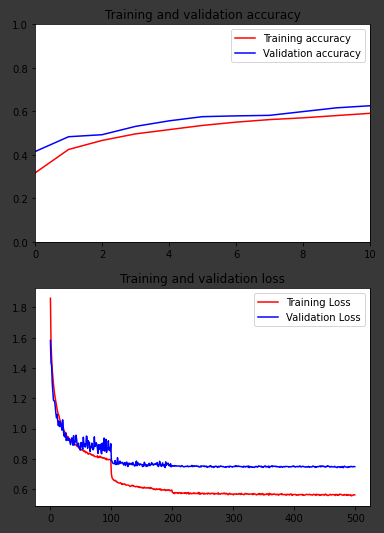

# AlexNet long test

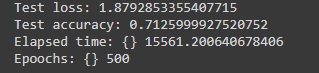

AlexNet, which I assumed would run better, actually did around 5% worse at identifing images versus its older counterpart





Similar to the predictions of the LeNet model, AlexNet slipped in regards to deciding if an image is a cat or a dog

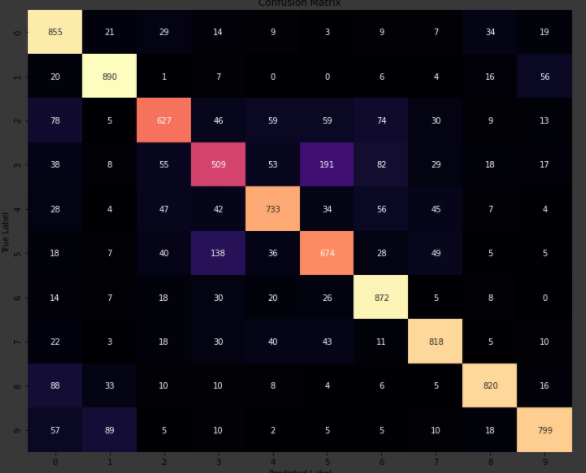


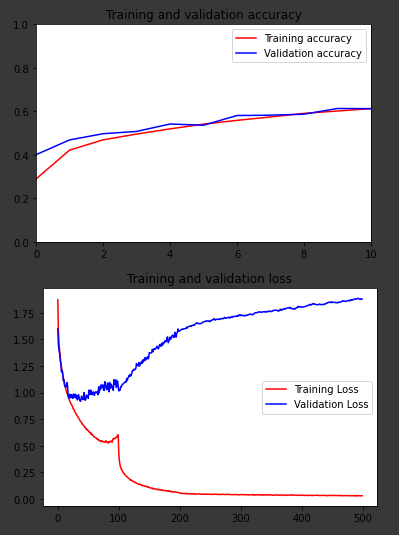

# LeNet medium test

For the next set of tests, the parameters where halved, this time instead of 1000ish iterations 512 would be used, along with half the epochs of 250, down from 500, with an average waiting time of 2 hours between the two, they performed nearly as well as the previous test, with LeNet scoring higher than AlexNet in the previous tests. Showing that the dropoff of accuracy again after the 2 hour mark is marginal, gaining 5% in the extra 2 hours of testing. Since my computer is slow this test is ideal if wanting to get a time effective prediction, however in the real world with more powerful machines we could see a better increase in this values than I was able to obtain

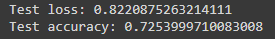

Same as the previous test, however we can see that the model begins to get more predictions wrong, indicating the 5% or so lose in accuracy

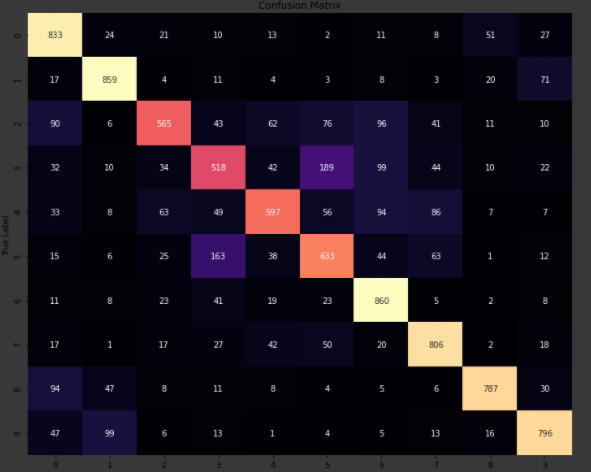

The accuracy shows the same rapid and steady pace as the previous test, however, the loss graph shows us that the values appearing here are closer than the values obtained in the previous test, which would indicate why it was able to nearly as good with less time given to it, without nearly as much overfitting happening.

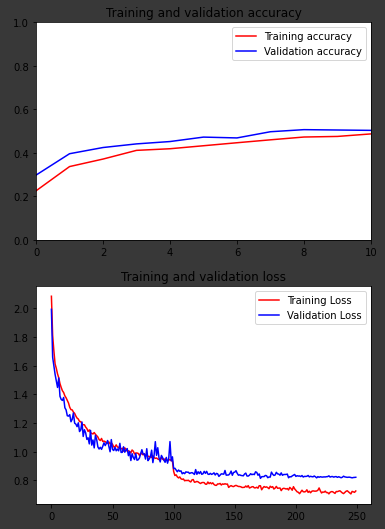

# AlexNet medium test

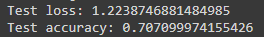

Performing a lot closer to LeNet than the previous version is Alexnet, the same statement before is also valid as the extra testing time did not necessarily mean that the result would be better for it, with less than 1% in the difference this test proves that changes would need to be made in order for AlexNet to perform any better with the given parameters

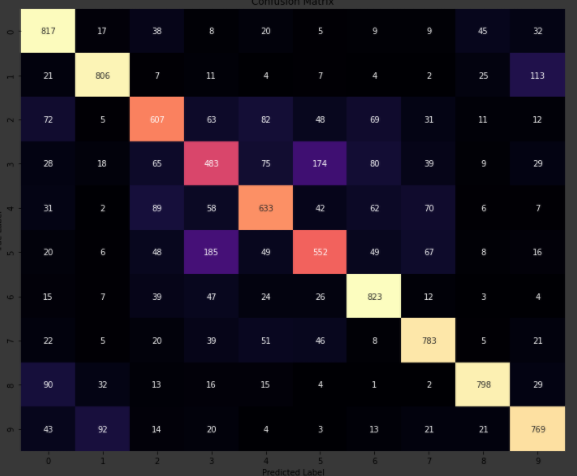

Proved again this is by the graphs, it seems that after each of my networks drastically underperformed after the 100 epoch mark, with AlexNet issues being due to the undertting happening.

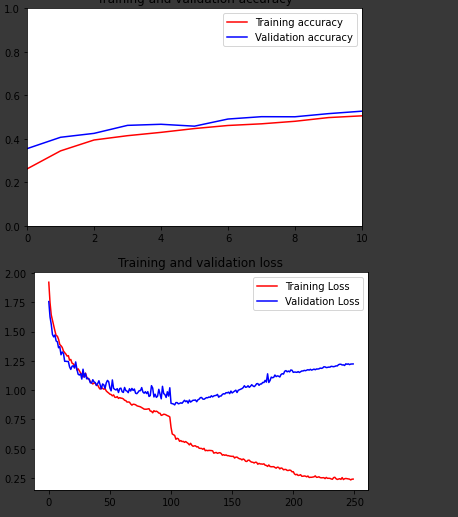

# LeNet short test

With the short test performed I decided to use 100 epochs, as previous tests have shown the performance tapers off after this mark, taking only 7 minutes to run versus its previous 2 hours, LeNet was able to gain a accuracy of 59% with smaller iterations 


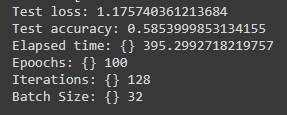



however visually we can see below that the predictions take drastic fall as more and more boundary class' are being guessed, showing the decrease in accuracy

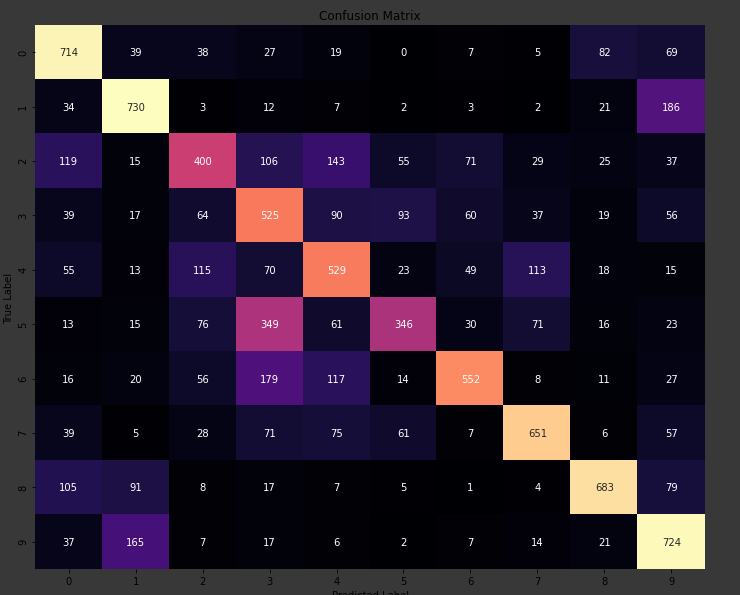

The graphs show that there is great growth in the early stages that drop off, with the loss showing that the training is working as intended

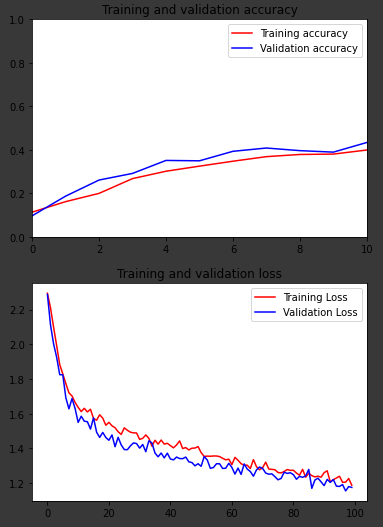

# AlexNet short test

comparative, AlexNet took nearly twice as long to run with it taking up to 12 minutes, however for the first time it is shown to of outperform LeNet, which could possibly be due to less unwanted 'noise' seen with smaller training sets

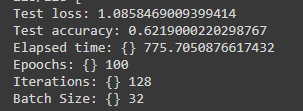

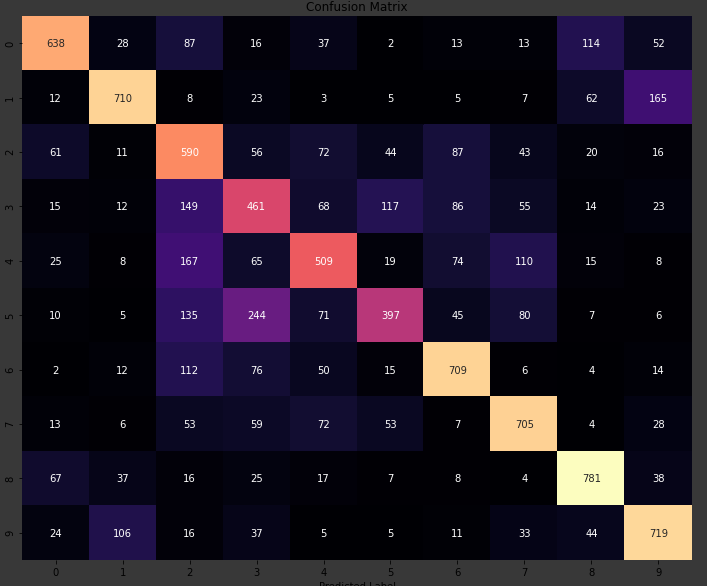

For the first time we can see the rapid increase in accuracy while using AlexNet, with the loss staying relatively the same, showing it working as intended, before the disturbance from higher training time

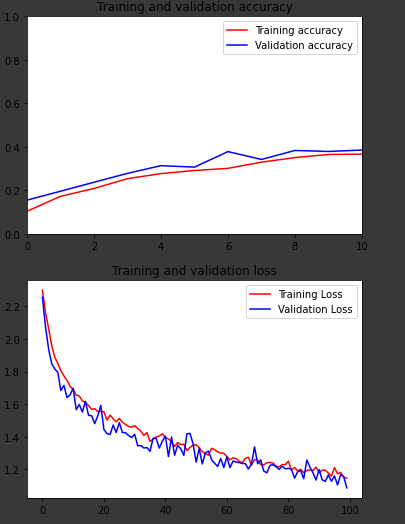

# Conclusion

In this project, we have explored and implemented LeNet & AlexNet, to play around with the CIFAR-10 dataset. The work shows just how easy it is to use and explore neural networks while using toolkits such as Keras, I found that by using a smaller batch size and iterations led to a higher accuracy, i.e, a neural network that performs better, in the same amount of training time, or less. Casually achieving a very high accuracy rate with just a few lines of codes. To my surprise LeNet, a seemingly outdated CNN algorithm versus AlexNet just shows how there are multiple approaches to a problem. It also shows just how valid old algorithms may be with use of modern technologies such as GPU. However it is recognised that AlexNet is particularly more powerful with images with higher resolutions than that of the images found in CIFAR-10, up against these LeNet might in fact and itself outdated. Like this, in the real world analysts face much more complex challenges, things are not going to be as smooth as we see here, but the basic strategy still holds. 

# References



*   https://www.cs.toronto.edu/~kriz/cifar.html

*    http://yann.lecun.com/exdb/lenet

*   http://d2l.ai/chapter_convolutional-modern/alexnet.html
*   https://www.researchgate.net/figure/AlexNet-architecture-characterize-between-two-GPUs-The-first-GPU-runs-on-top-layer-part_fig5_341199270



